### <i>LouvainDP Algorithm</i> 
`LouvainDP(G, k, epsilon)`

---
#### <i>Input:</i>
- <i>G</i> : input graph  
- <i>k</i> : group size to create supernodes  
- <i>ε (epsilon)</i> : privacy budget  

#### <i>Output:</i>
- <i>C</i> : the noisy partition of the graph into communities  

---

#### <i>Algorithm:</i>
1. Import the graph $G$.  
2. Initialize a new graph $G_1$ with $n_1$ nodes and $v_1$ edges.  
3. Initialize $\epsilon$, $\epsilon_1$, and $\alpha .$  
4. Get a random permutation of edges.  
5. Calculate $m_1$, $m_0$, $\theta$, and $s$.  
6. Add noise to the edges.  
7. Run the Louvain method.  


In [1]:
import os
import random
from louvainDP import LouvainDP
from utils import intro, graph_info, cluster_analysis
from dotenv import load_dotenv

import numpy as np
import networkx as nx
from networkx.algorithms.community.quality import modularity
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
k = [4,8,16,32,64]      # different group sizes for supernode

### <i>As20 Graph Dataset</i>

In [3]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('as20graph')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"As20Graph dataset")

As20Graph dataset
------------------------------------
number of nodes: 334863
number of edges: 925872
directed graph: False
average degree: 5.0
number of connected components: 1
density: 1.6513834036534368e-05
average clusting: 0.3967


In [4]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 31
largest: 1473
smallest: 5
mean cluster size: 208.84
standard deviation: 288.44


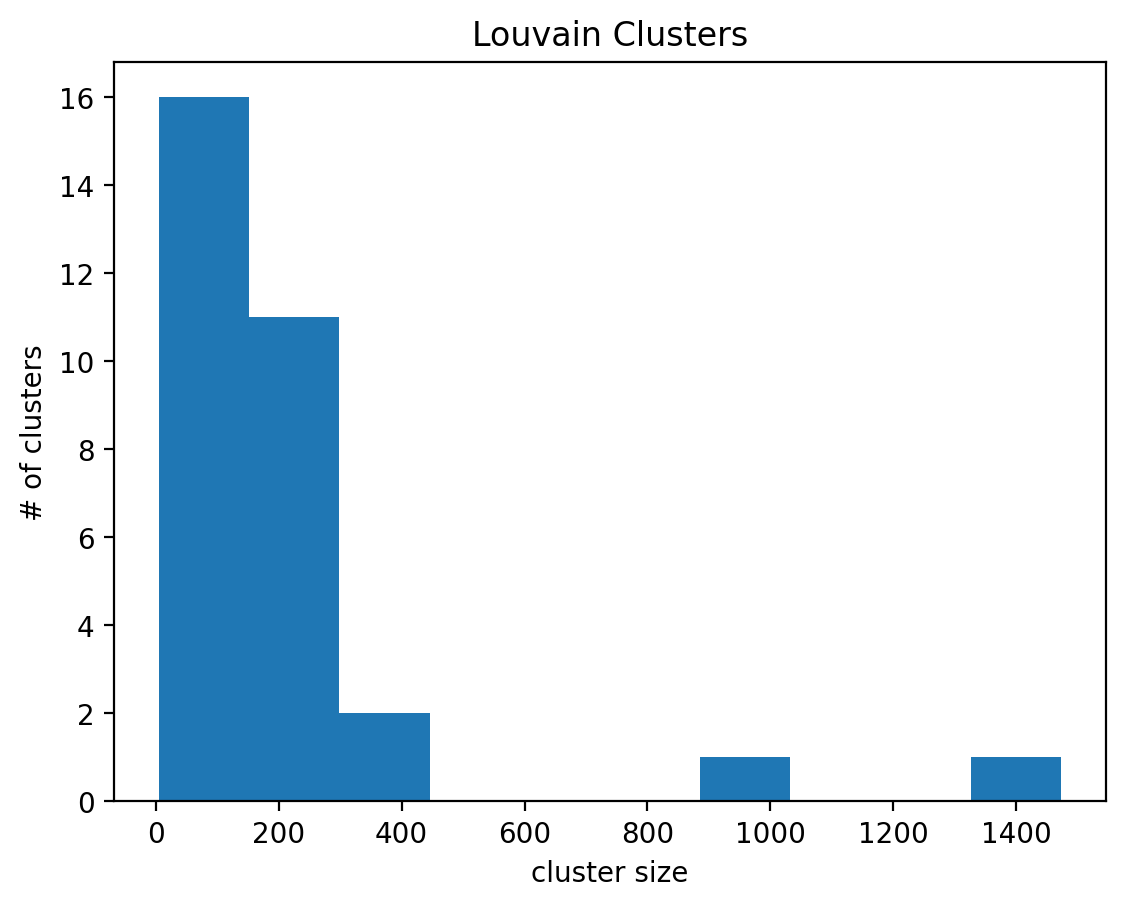

In [5]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.3877747172430945
number of clusters: 21
largest: 652
smallest: 148
mean cluster size: 308.29
standard deviation: 135.45


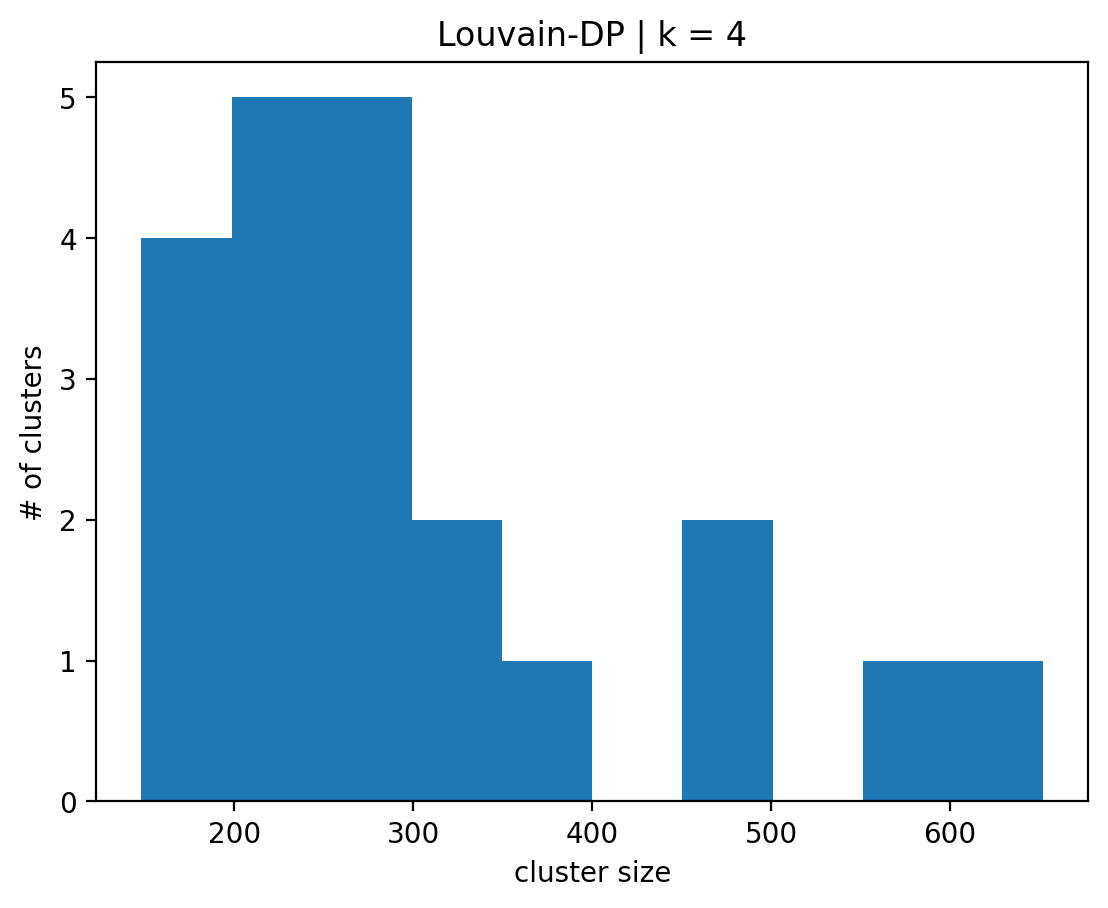

k: 8
epsilon 4.3877747172430945
number of clusters: 14
largest: 792
smallest: 224
mean cluster size: 462.43
standard deviation: 168.27


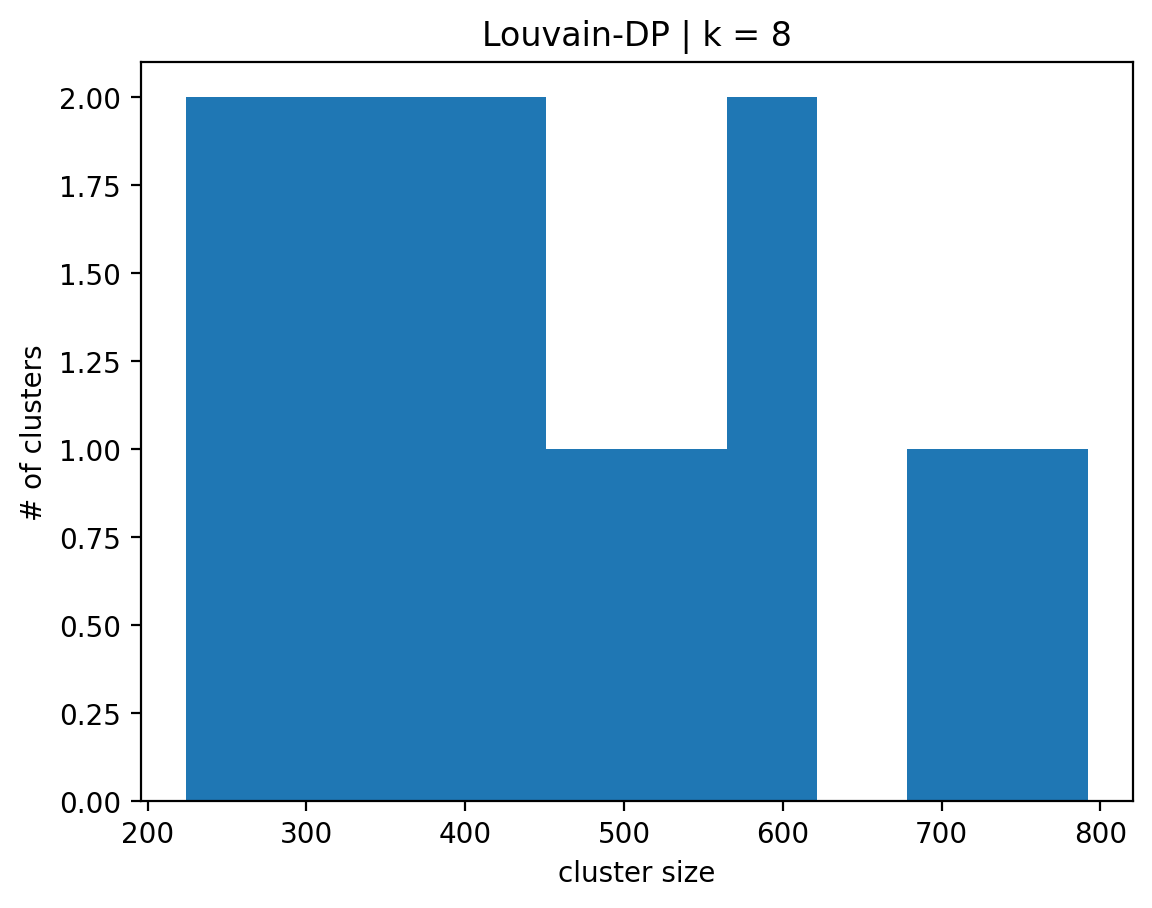

k: 16
epsilon 4.3877747172430945
number of clusters: 12
largest: 978
smallest: 194
mean cluster size: 539.5
standard deviation: 204.57


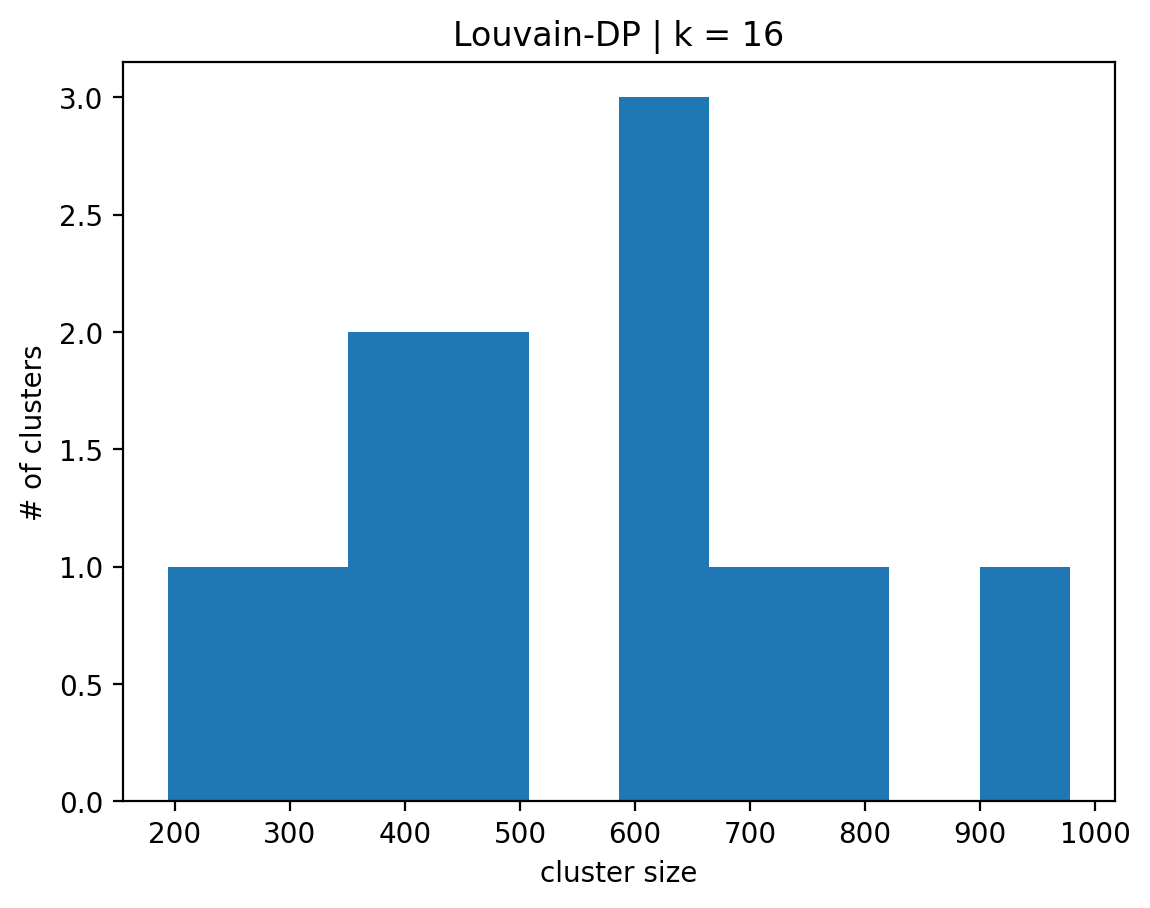

k: 32
epsilon 4.3877747172430945
number of clusters: 11
largest: 897
smallest: 257
mean cluster size: 588.55
standard deviation: 187.95


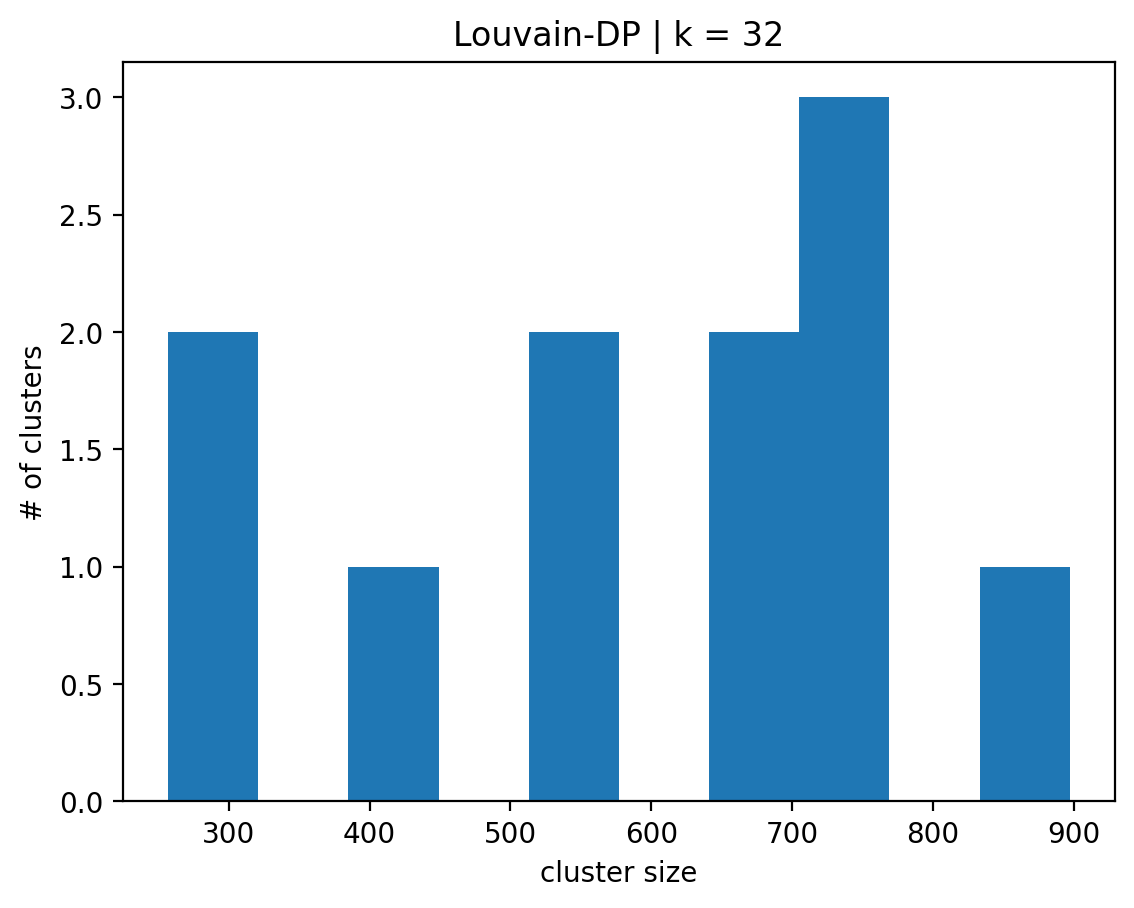

k: 64
epsilon 4.3877747172430945
number of clusters: 7
largest: 1472
smallest: 448
mean cluster size: 924.86
standard deviation: 316.75


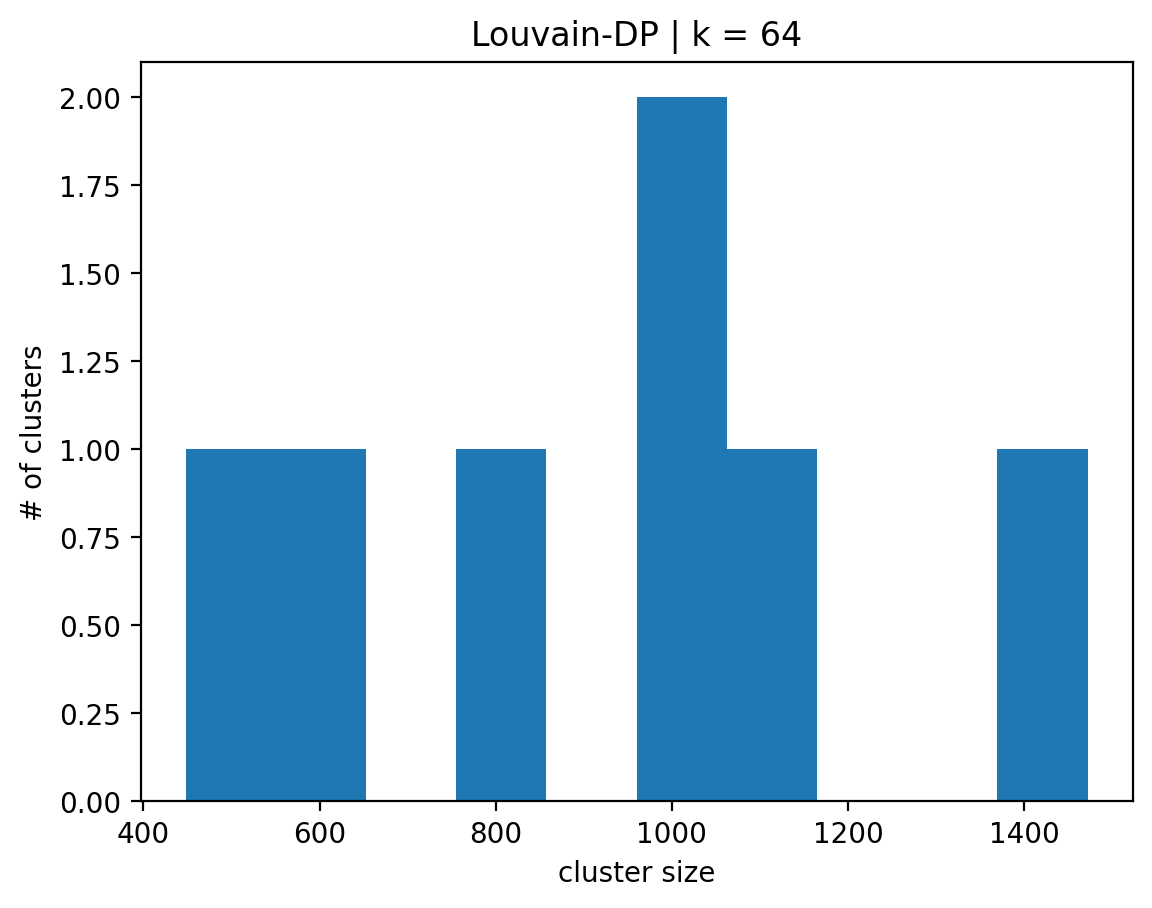

In [6]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [7]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6533135176549667 

Modularity of Louvain-DP communities: 0.22208741834772977 	| k: 4
Modularity of Louvain-DP communities: 0.1591732653825192 	| k: 8
Modularity of Louvain-DP communities: 0.12385468508286006 	| k: 16
Modularity of Louvain-DP communities: 0.10974720572390394 	| k: 32
Modularity of Louvain-DP communities: 0.08647553924779754 	| k: 64


### <i>Ca-astorPh Graph Dataset</i>

In [4]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('ca-astroph')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Ca-AstroPh graph dataset")

Ca-AstroPh graph dataset
------------------------------------
number of nodes: 18772
number of edges: 198110
directed graph: False
average degree: 21.0
number of connected components: 290
density: 0.0011244455715955115
average clusting: 0.6306


In [9]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 324
largest: 2008
smallest: 1
mean cluster size: 57.94
standard deviation: 227.93


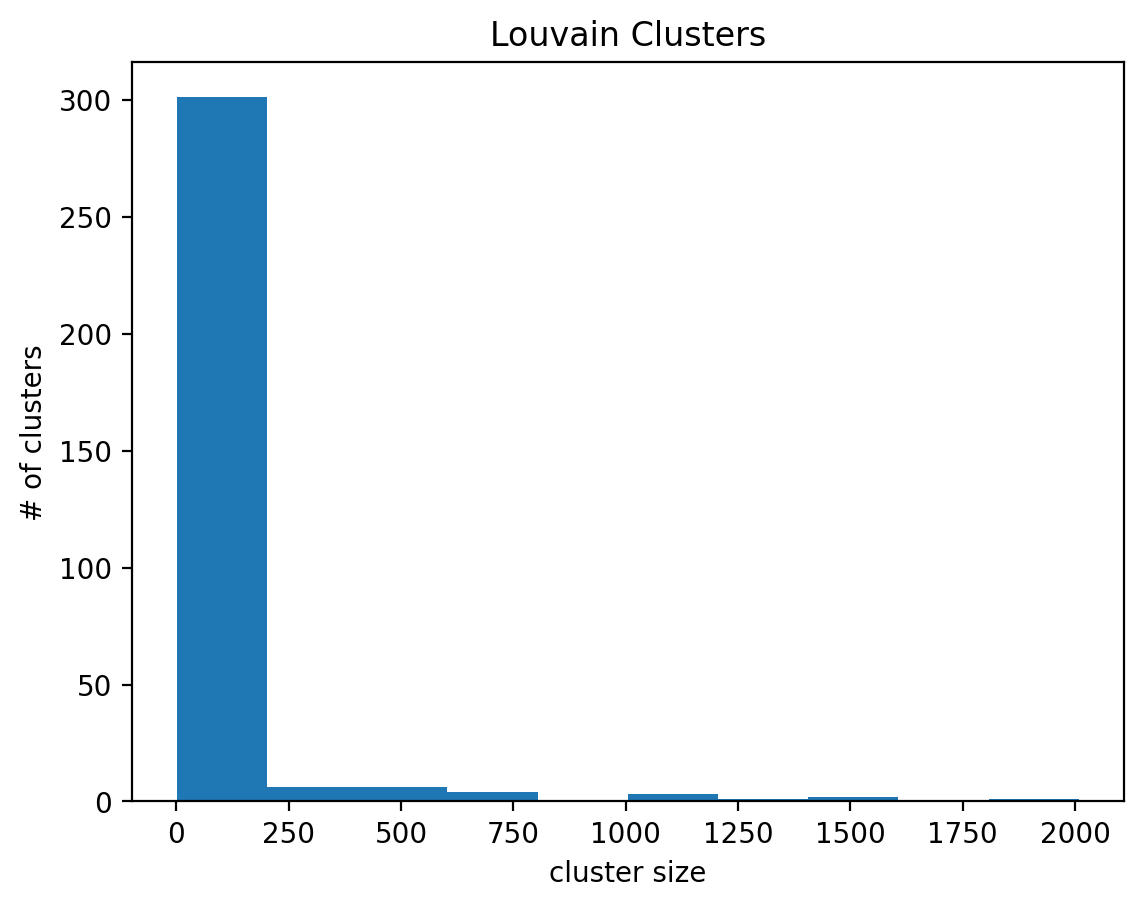

In [10]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.920060838457154
number of clusters: 20
largest: 1852
smallest: 244
mean cluster size: 938.6
standard deviation: 536.67


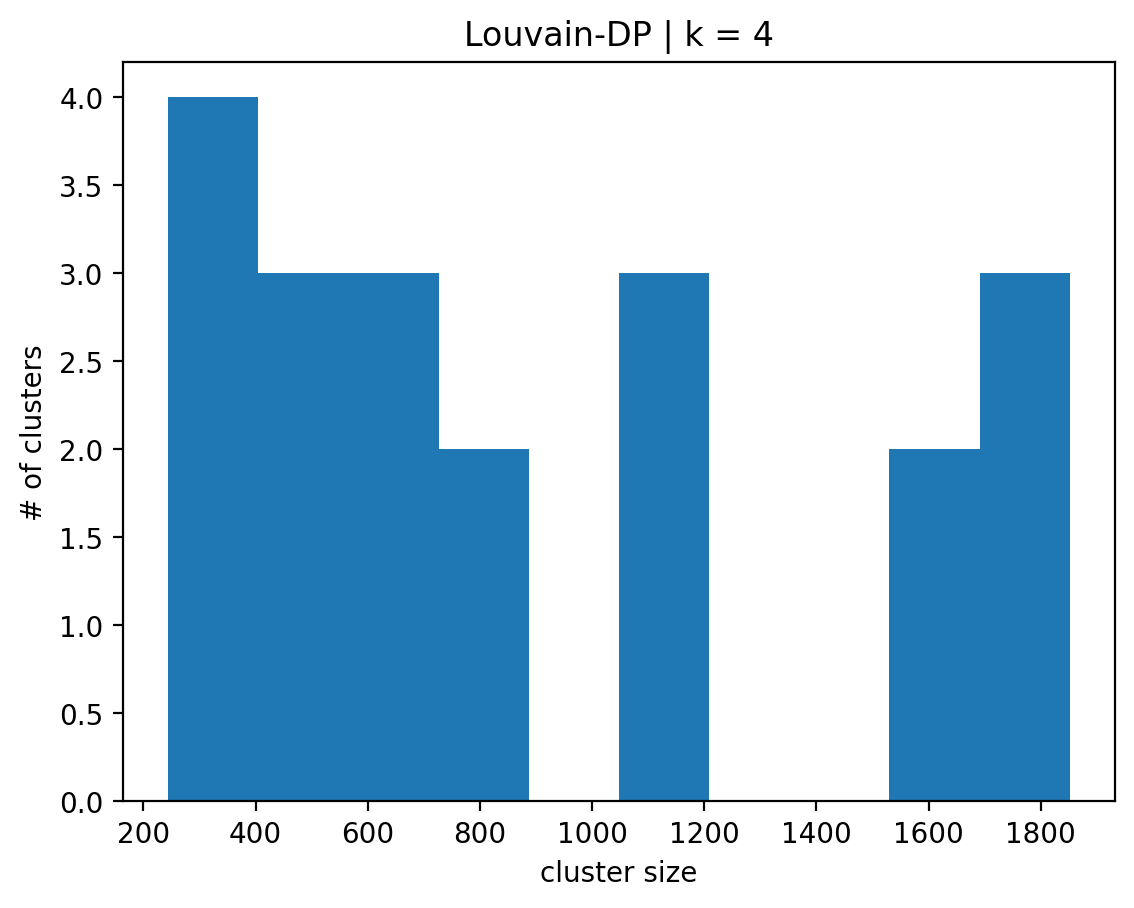

k: 8
epsilon 4.920060838457154
number of clusters: 15
largest: 2624
smallest: 744
mean cluster size: 1251.47
standard deviation: 498.35


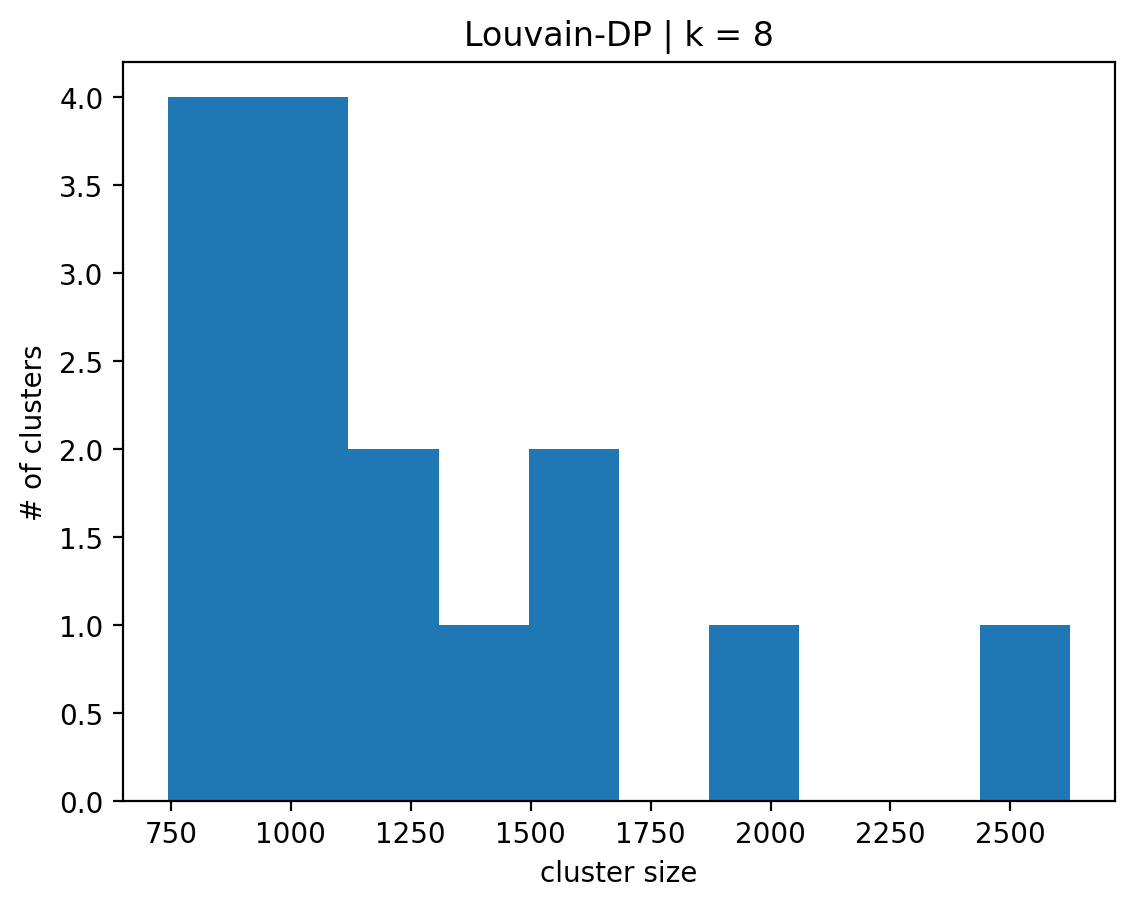

k: 16
epsilon 4.920060838457154
number of clusters: 9
largest: 3201
smallest: 1344
mean cluster size: 2085.78
standard deviation: 510.55


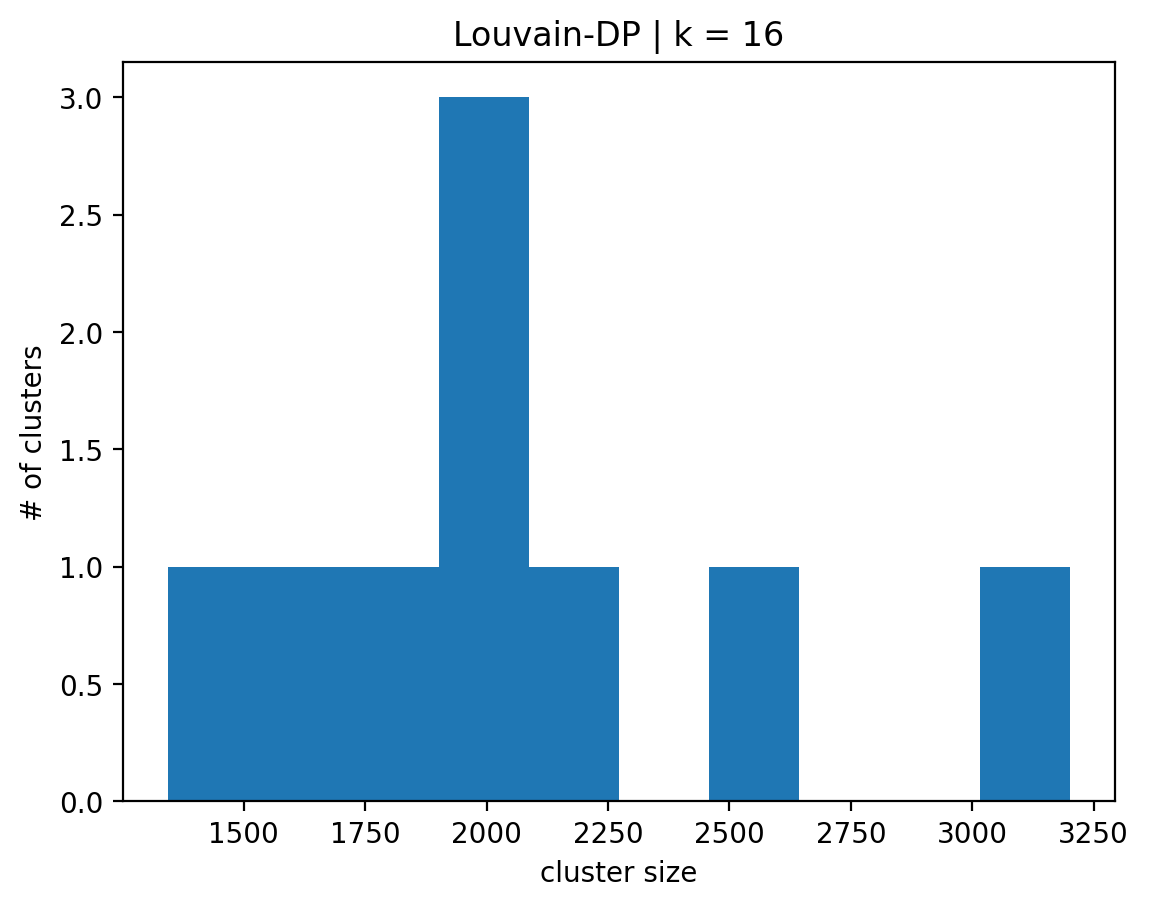

k: 32
epsilon 4.920060838457154
number of clusters: 9
largest: 2977
smallest: 899
mean cluster size: 2085.78
standard deviation: 798.33


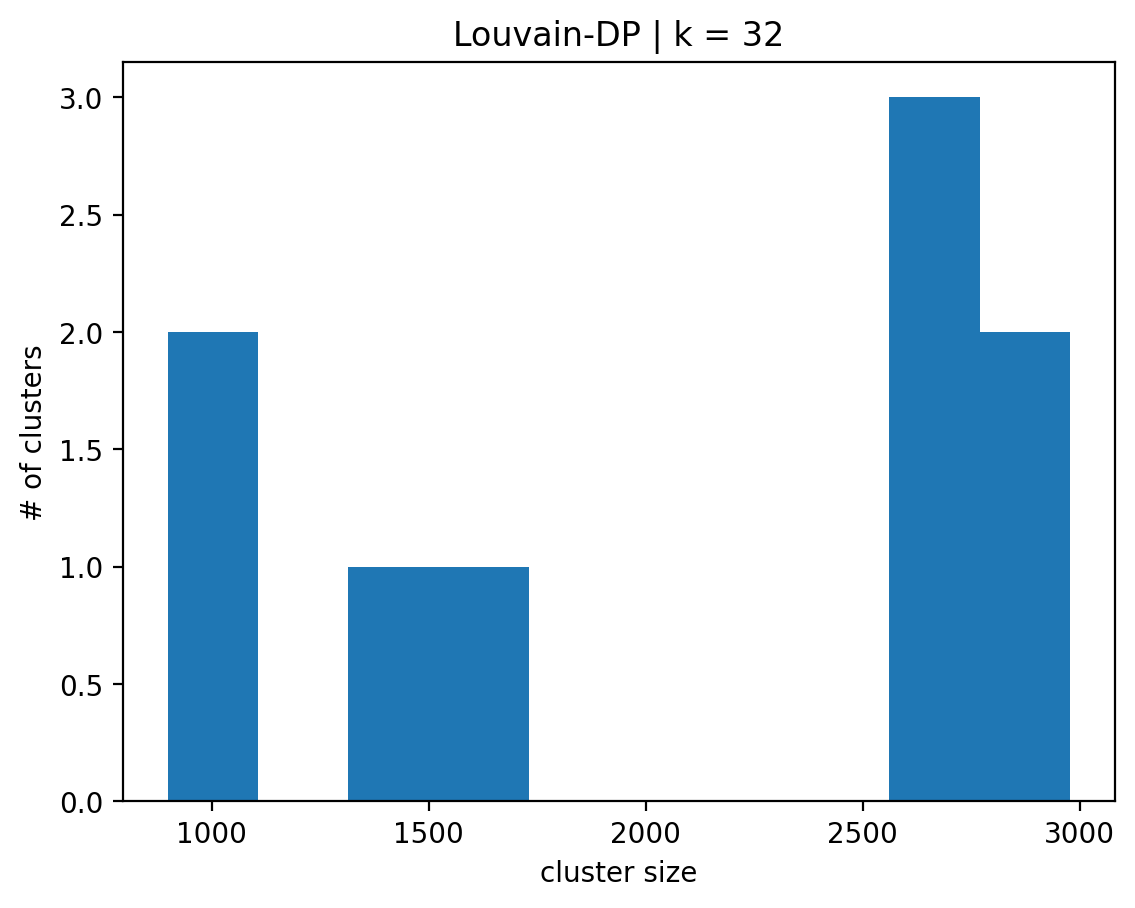

k: 64
epsilon 4.920060838457154
number of clusters: 8
largest: 3012
smallest: 1666
mean cluster size: 2346.5
standard deviation: 477.39


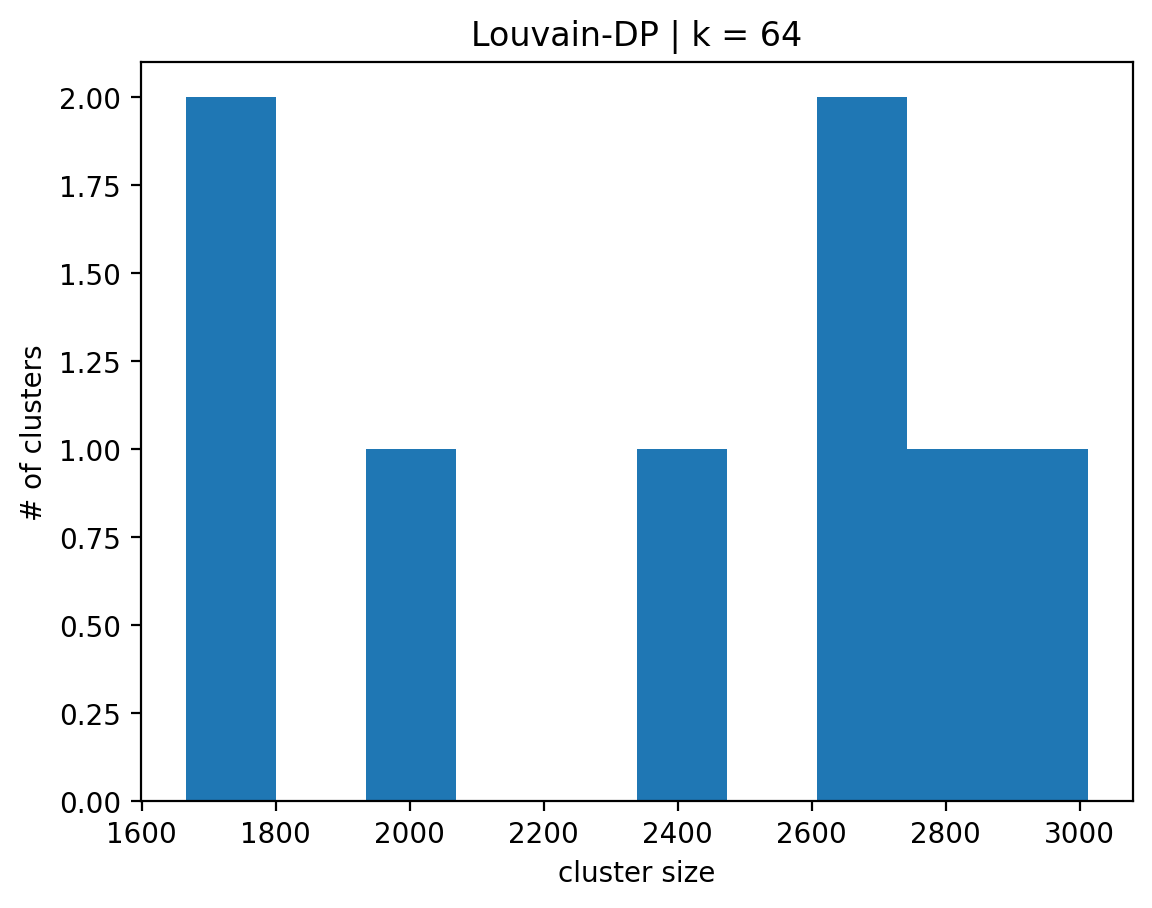

In [11]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [12]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6242853635779333 

Modularity of Louvain-DP communities: 0.2541016073450312 	| k: 4
Modularity of Louvain-DP communities: 0.1393744648984287 	| k: 8
Modularity of Louvain-DP communities: 0.06651166222075683 	| k: 16
Modularity of Louvain-DP communities: 0.01249486130633798 	| k: 32
Modularity of Louvain-DP communities: 0.002312958156206556 	| k: 64


### <i>Amazon Co-purchasing Graph Dataset</i>

In [5]:
# amazon co-purchasing graph dataset
load_dotenv()
amazon_file_path = os.getenv('amazon')

G = nx.read_edgelist(amazon_file_path, comments='#')

graph_info(G,"Amazon co-purchasing graph dataset")

Amazon co-purchasing graph dataset
------------------------------------
number of nodes: 334863
number of edges: 925872
directed graph: False
average degree: 5.0
number of connected components: 1
density: 1.6513834036534368e-05
average clusting: 0.3967


In [14]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 242
largest: 11938
smallest: 11
mean cluster size: 1383.73
standard deviation: 2155.57


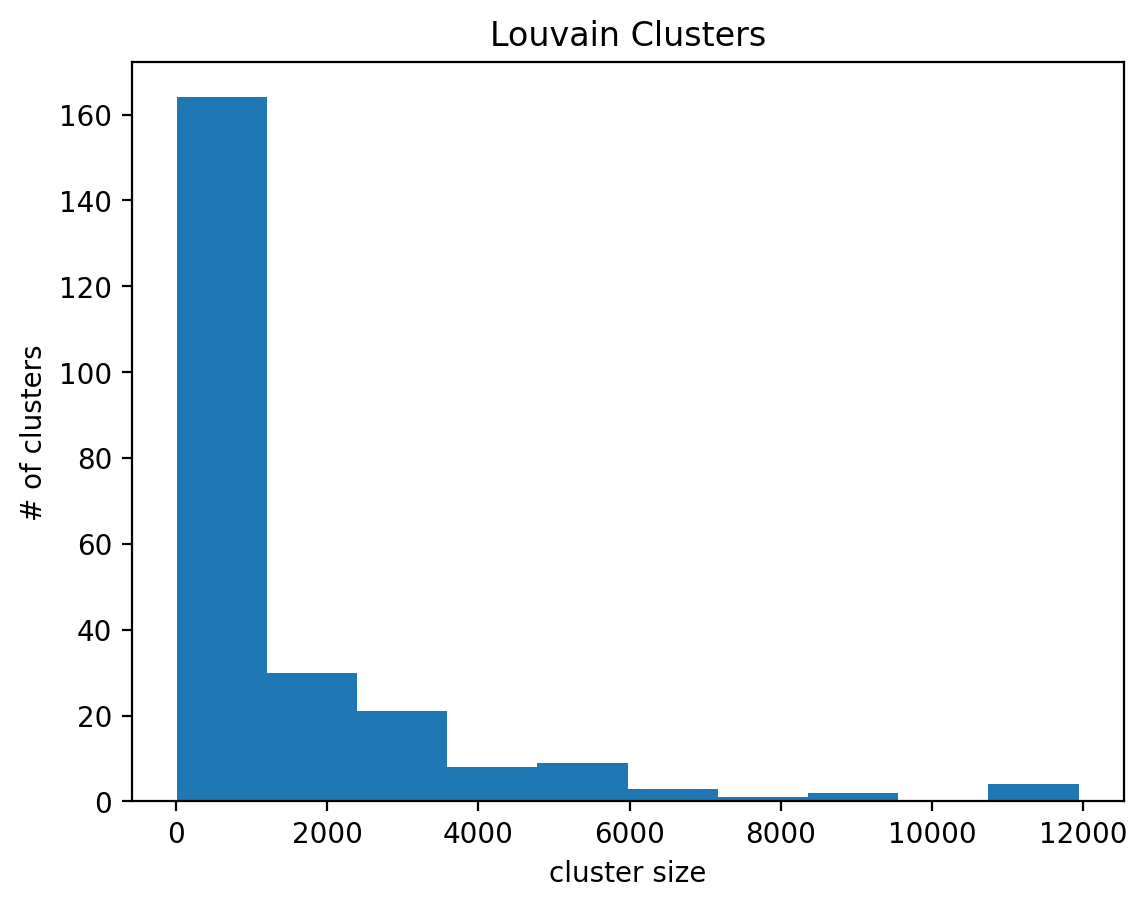

In [15]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 6.360738385969165
number of clusters: 108
largest: 7448
smallest: 1164
mean cluster size: 3100.58
standard deviation: 1034.96


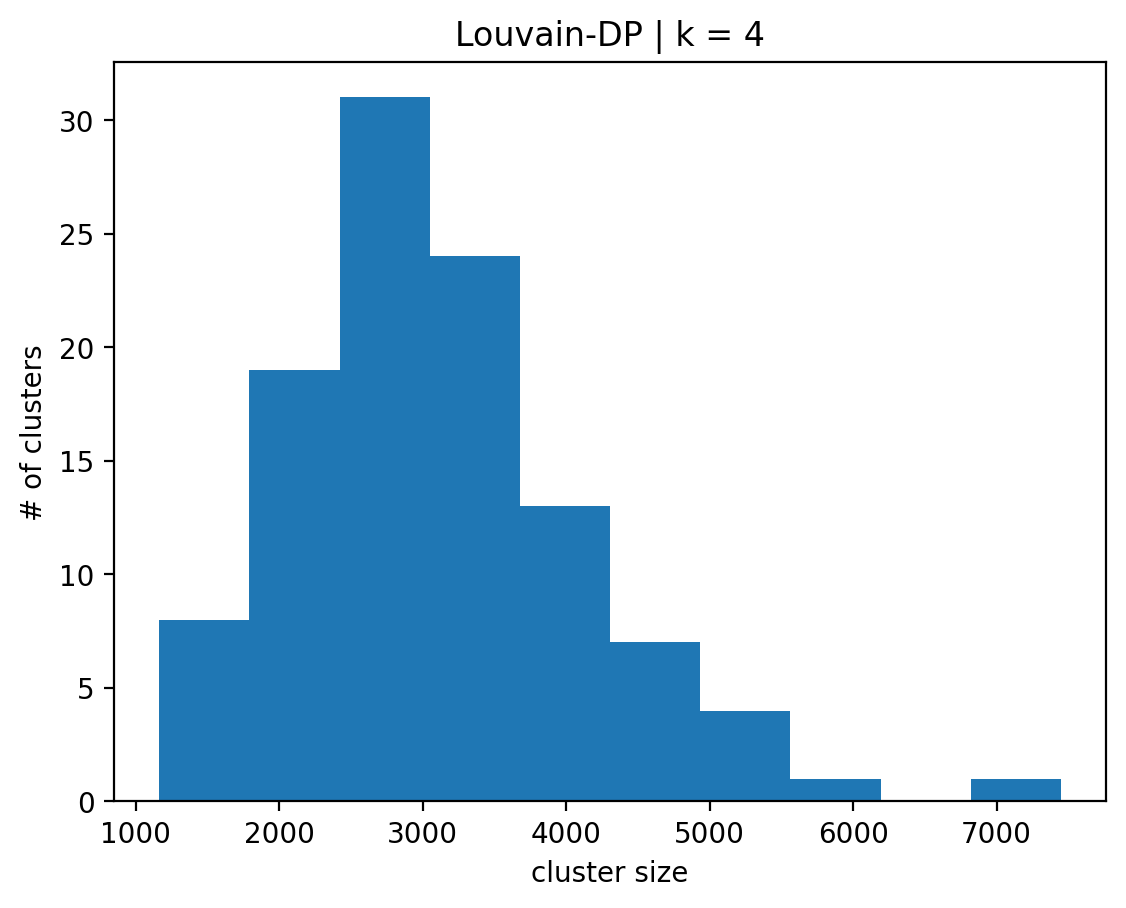

k: 8
epsilon 6.360738385969165
number of clusters: 47
largest: 20928
smallest: 1160
mean cluster size: 7124.74
standard deviation: 4178.36


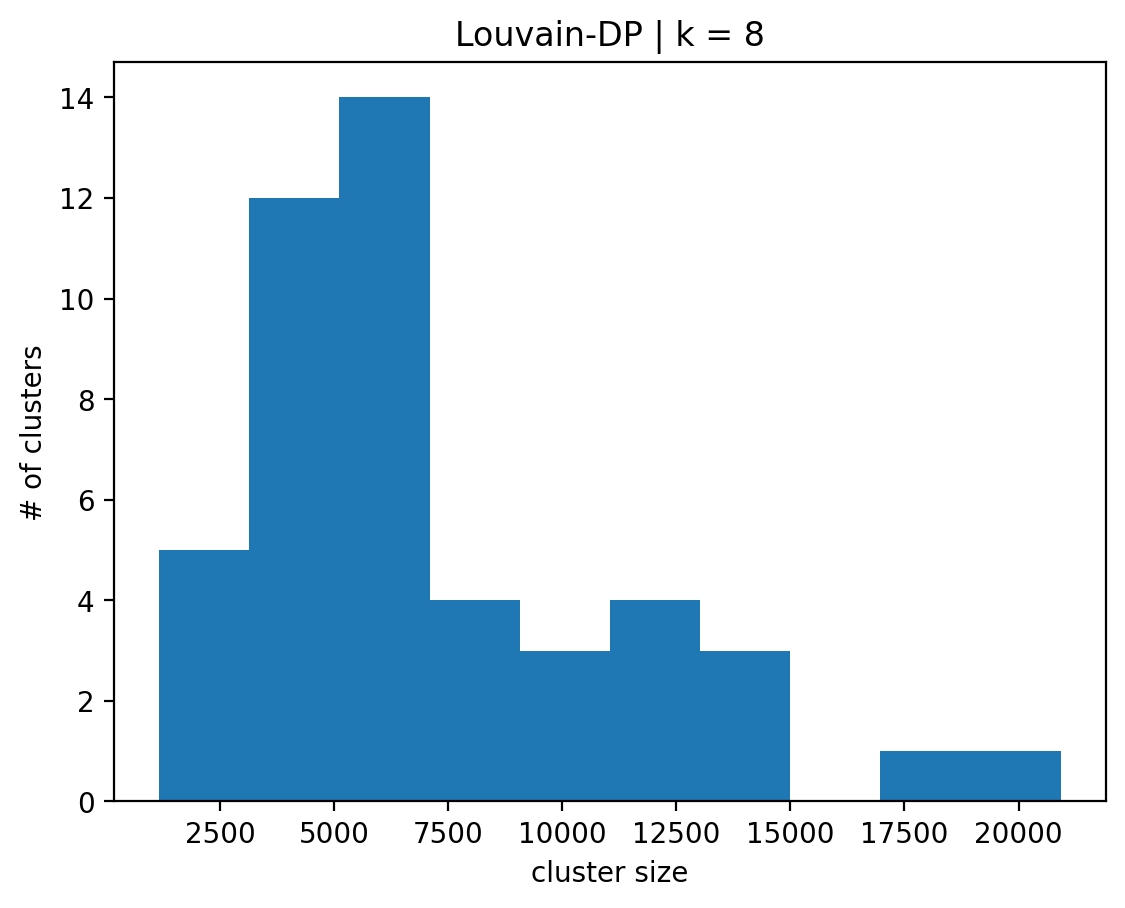

k: 16
epsilon 6.360738385969165
number of clusters: 22
largest: 30305
smallest: 5056
mean cluster size: 15221.05
standard deviation: 6989.09


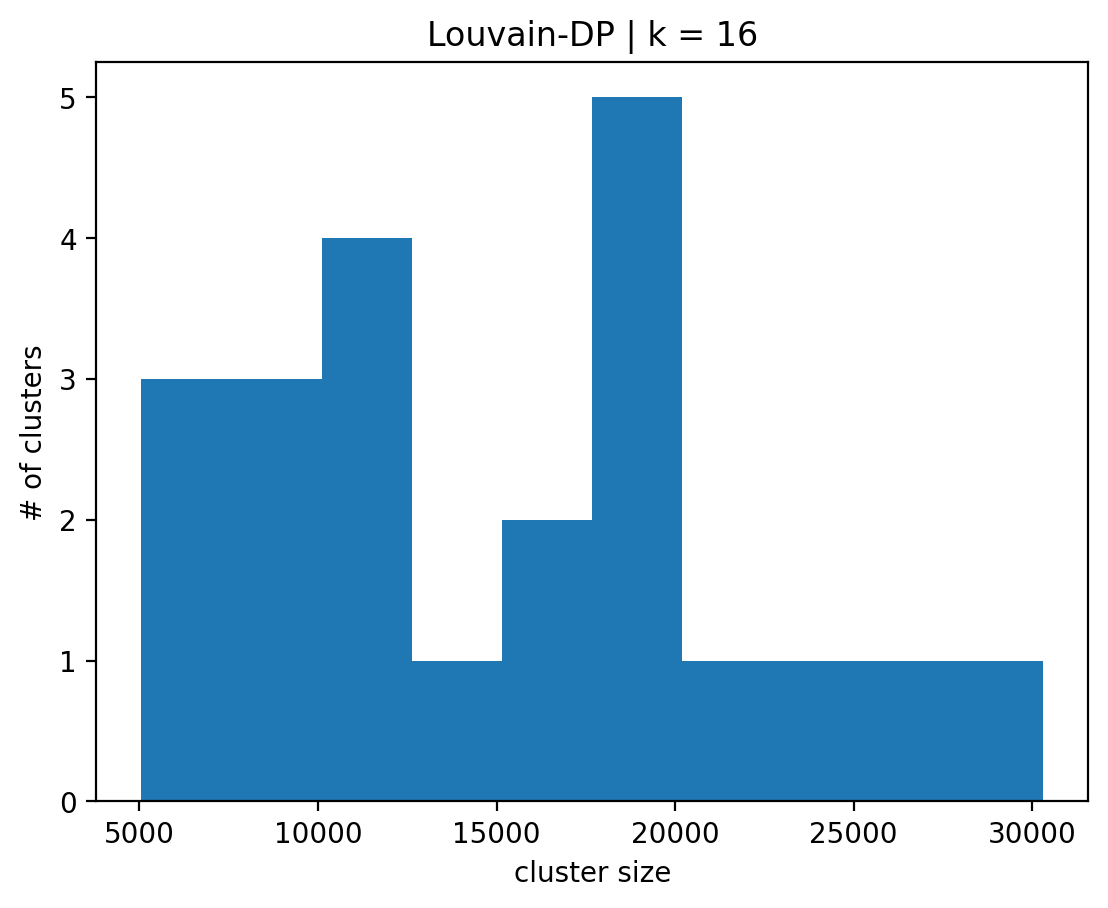

k: 32
epsilon 6.360738385969165
number of clusters: 8
largest: 75874
smallest: 129
mean cluster size: 41857.88
standard deviation: 27076.81


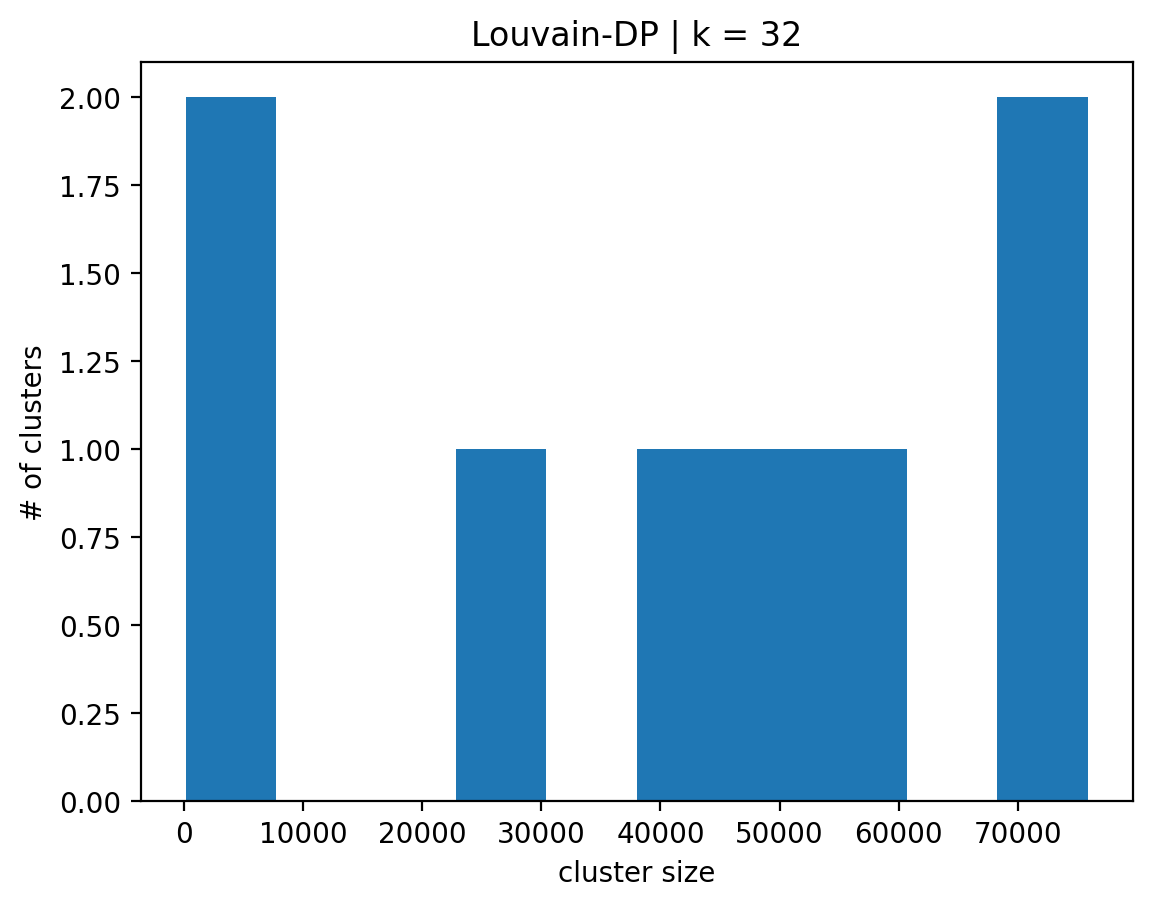

k: 64
epsilon 6.360738385969165
number of clusters: 9
largest: 53888
smallest: 16833
mean cluster size: 37207.0
standard deviation: 11173.34


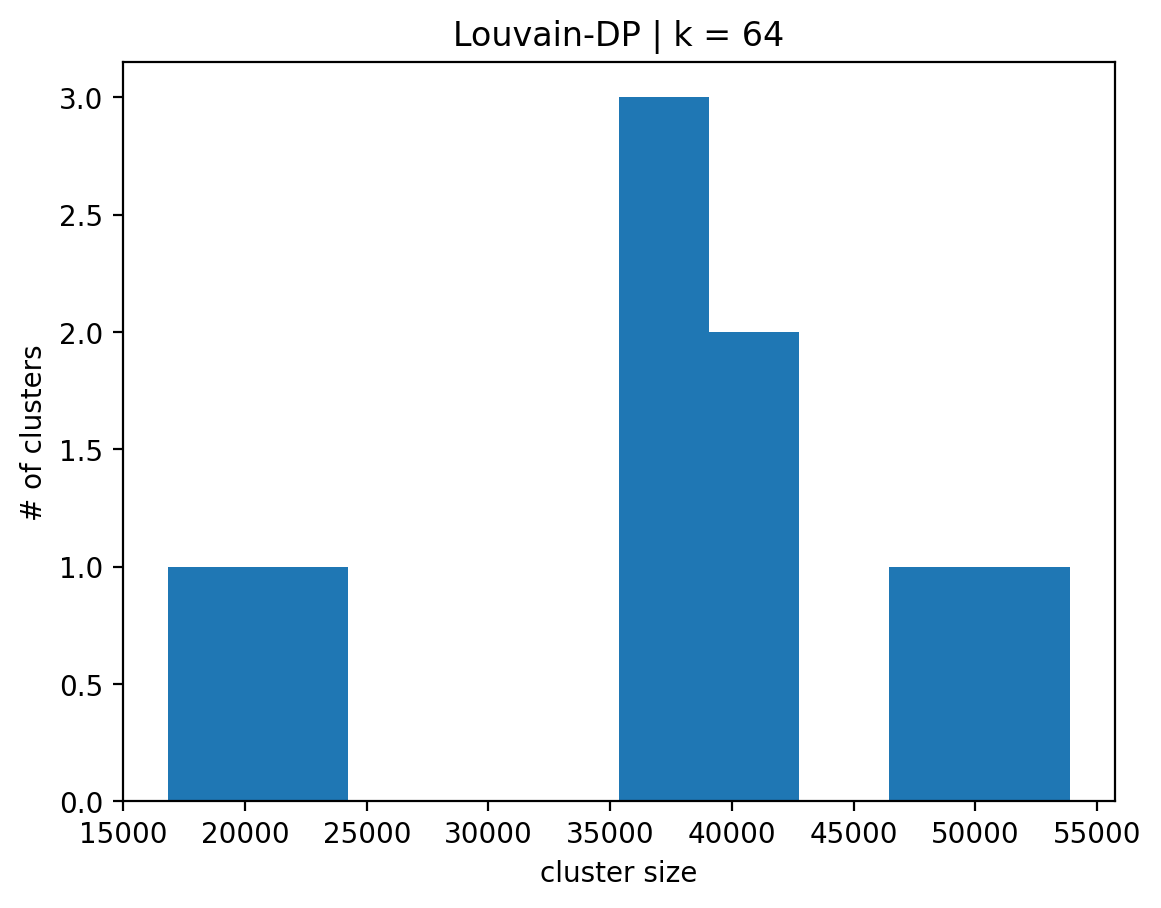

In [16]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [17]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.9263909627459835 

Modularity of Louvain-DP communities: 0.17391621383810668 	| k: 4
Modularity of Louvain-DP communities: 0.08339846124232964 	| k: 8
Modularity of Louvain-DP communities: 0.04816384163174885 	| k: 16
Modularity of Louvain-DP communities: 0.05000635461761742 	| k: 32
Modularity of Louvain-DP communities: 0.03155437301331138 	| k: 64


### <i>Dblp Graph Dataset</i>

In [6]:
# amazon co-purchasing graph dataset
load_dotenv()
amazon_file_path = os.getenv('dblp')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Dblp graph dataset")

Dblp graph dataset
------------------------------------
number of nodes: 18772
number of edges: 198110
directed graph: False
average degree: 21.0
number of connected components: 290
density: 0.0011244455715955115
average clusting: 0.6306


In [19]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 324
largest: 2008
smallest: 1
mean cluster size: 57.94
standard deviation: 227.93


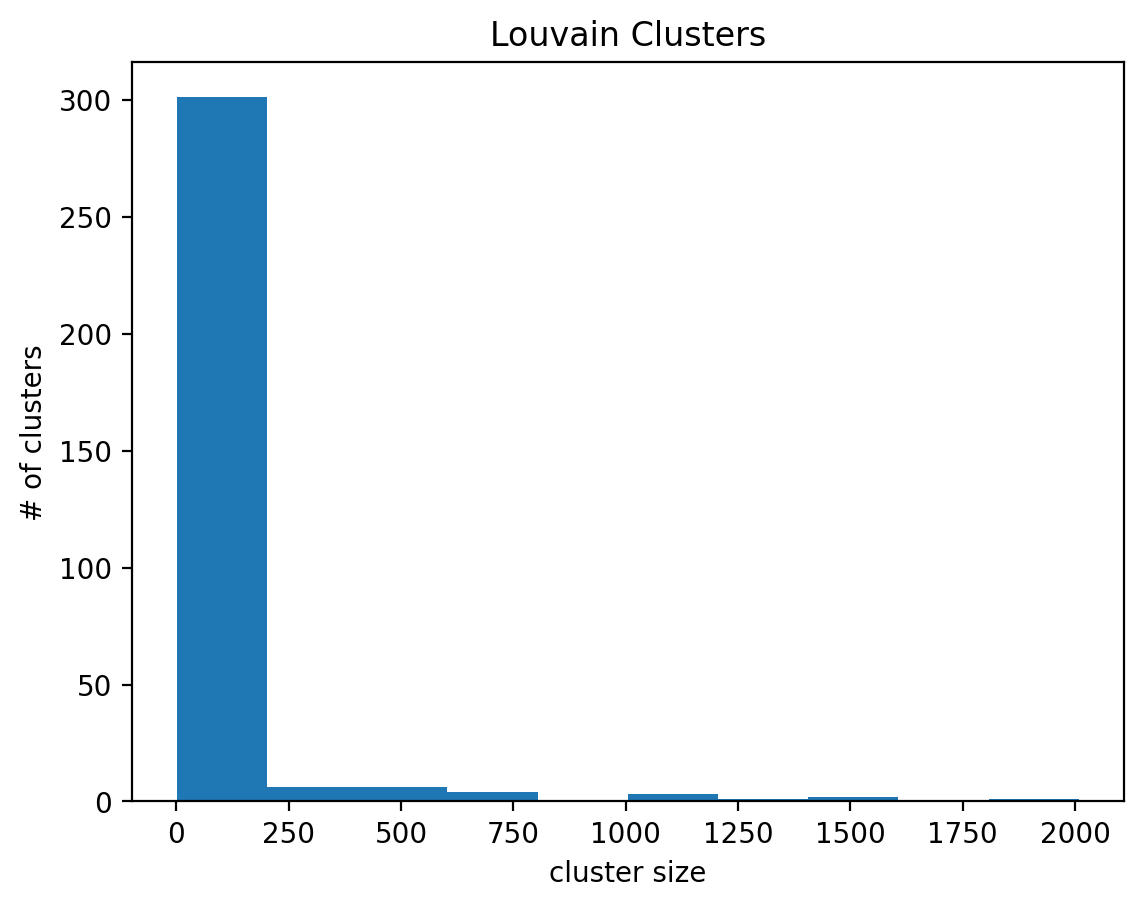

In [20]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.920060838457154
number of clusters: 18
largest: 2416
smallest: 336
mean cluster size: 1042.89
standard deviation: 527.46


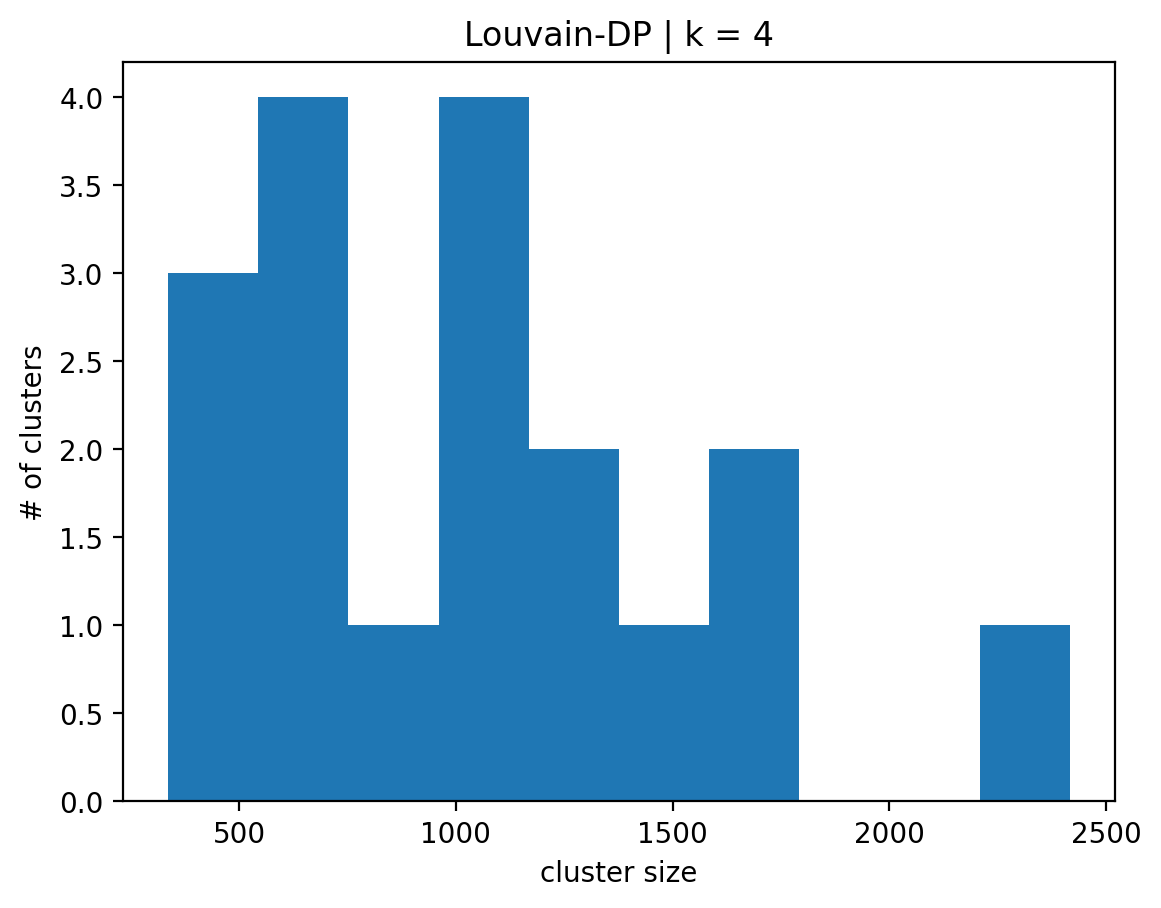

k: 8
epsilon 4.920060838457154
number of clusters: 13
largest: 3232
smallest: 344
mean cluster size: 1444.0
standard deviation: 808.91


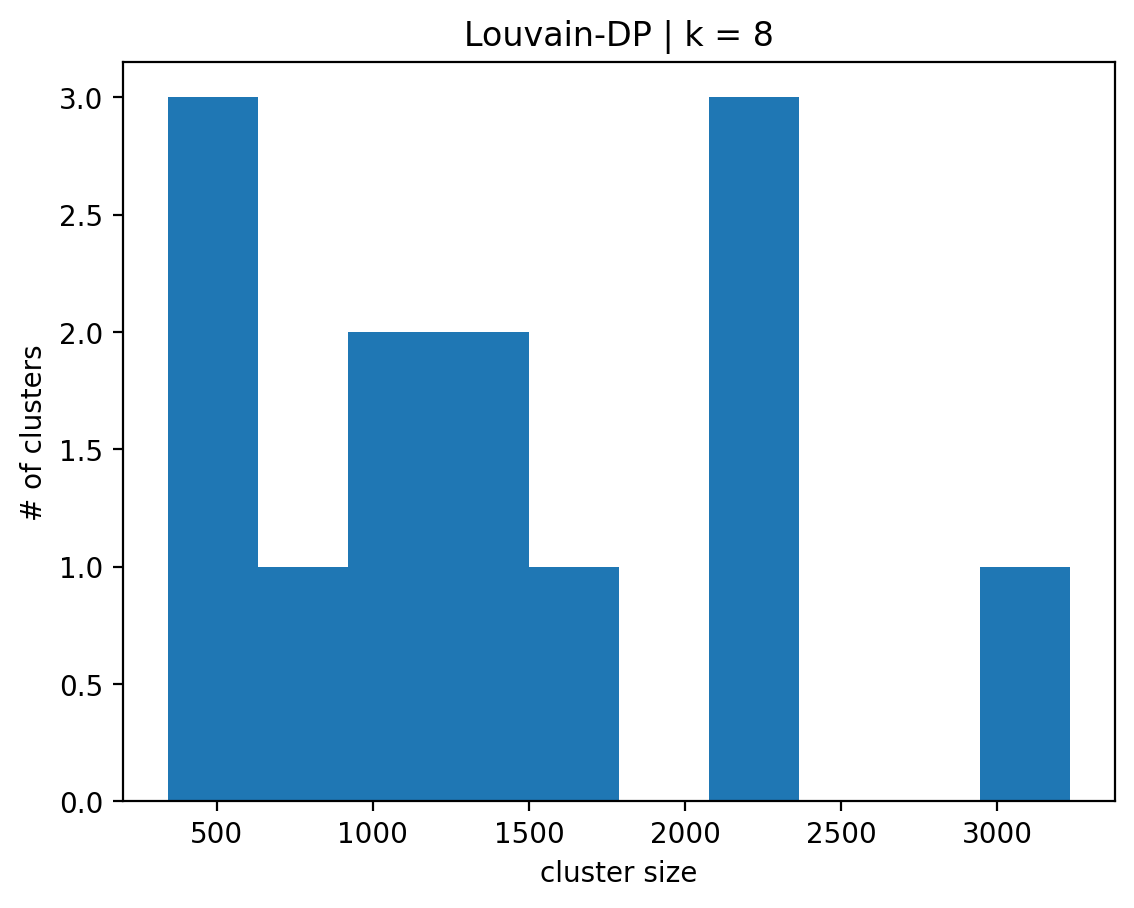

k: 16
epsilon 4.920060838457154
number of clusters: 10
largest: 3008
smallest: 625
mean cluster size: 1877.2
standard deviation: 807.81


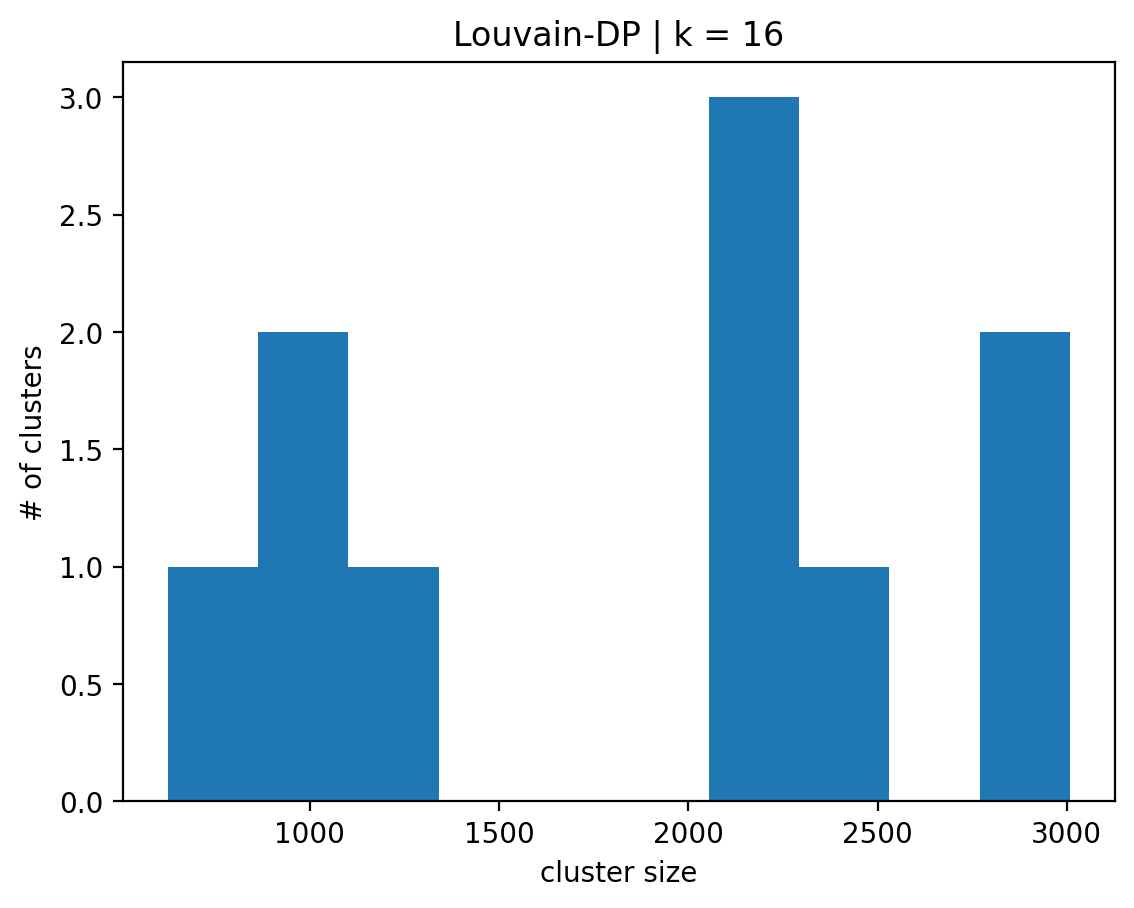

k: 32
epsilon 4.920060838457154
number of clusters: 8
largest: 3137
smallest: 1059
mean cluster size: 2346.5
standard deviation: 641.15


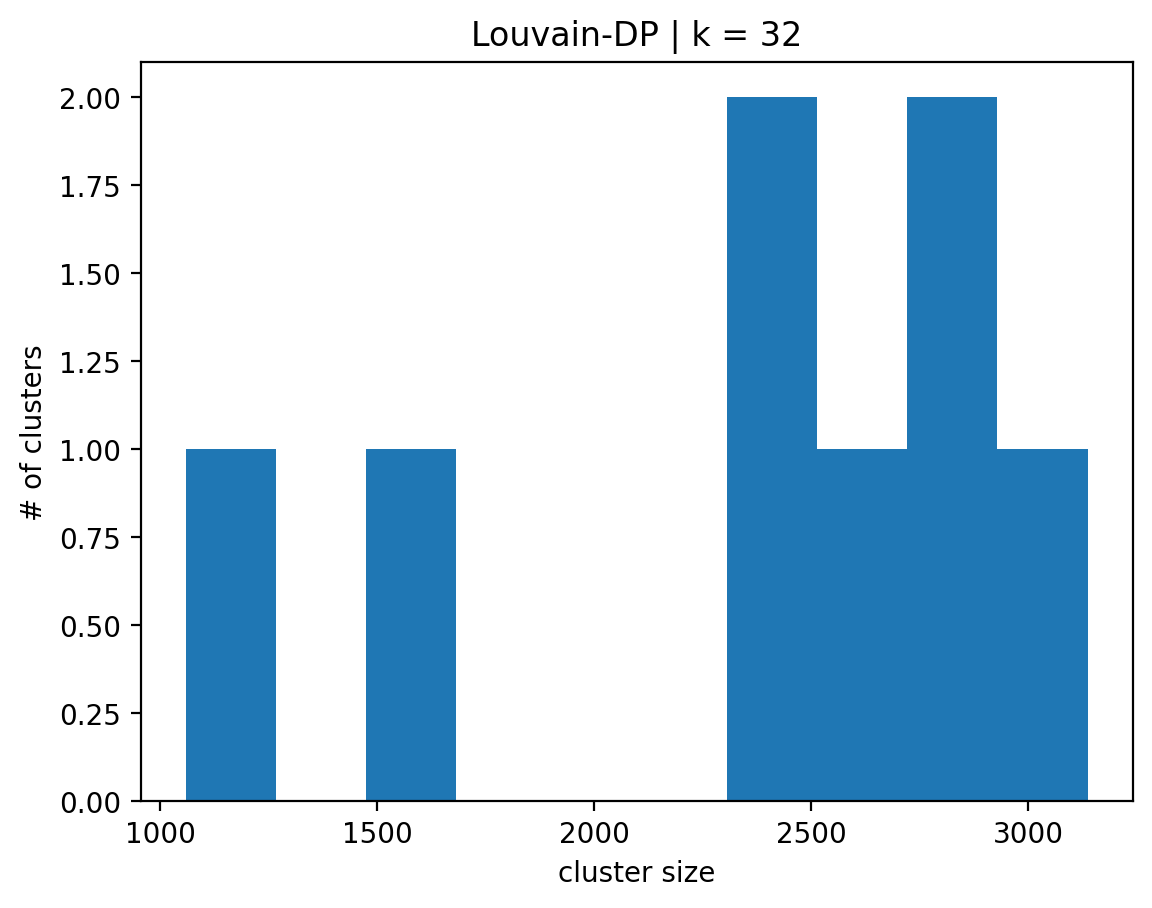

k: 64
epsilon 4.920060838457154
number of clusters: 8
largest: 3264
smallest: 1538
mean cluster size: 2346.5
standard deviation: 512.6


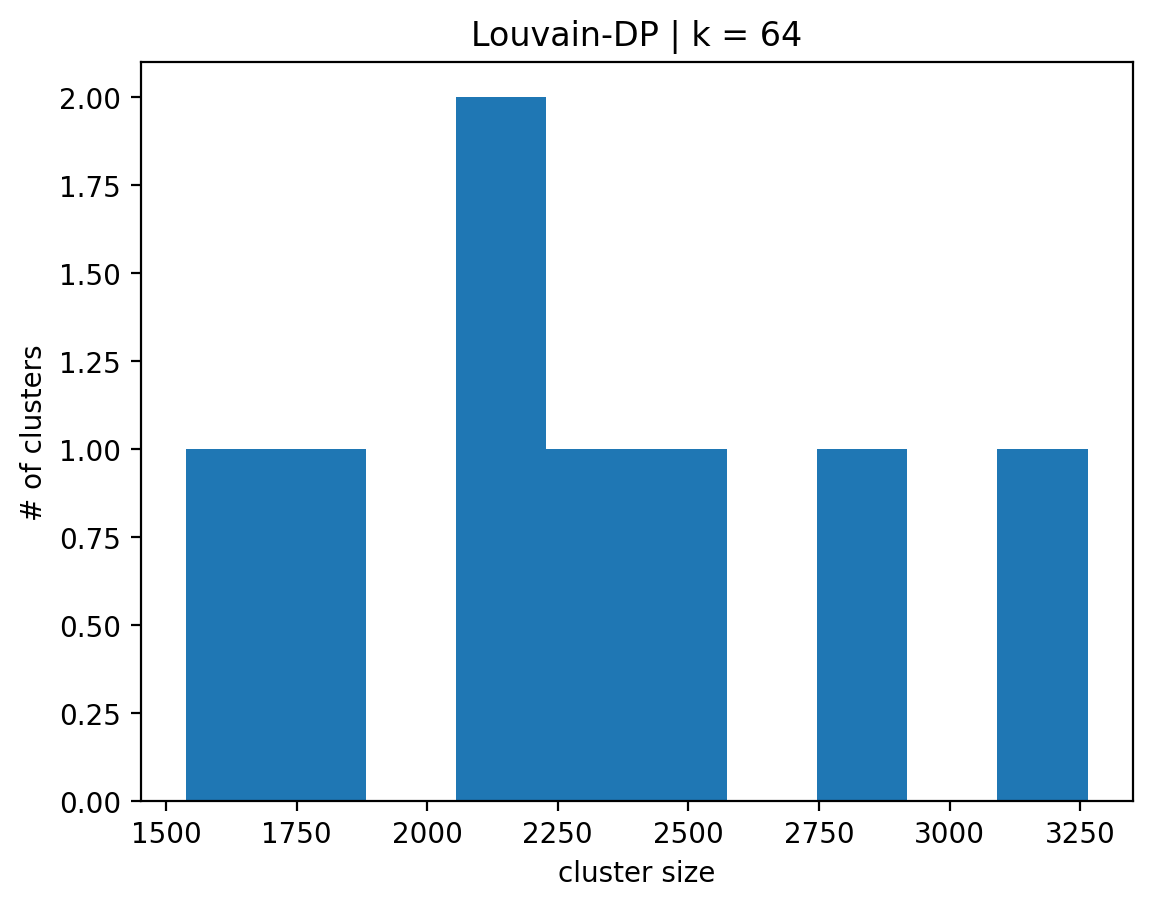

In [21]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [22]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6242853635779333 

Modularity of Louvain-DP communities: 0.24916302574293508 	| k: 4
Modularity of Louvain-DP communities: 0.1479971491663302 	| k: 8
Modularity of Louvain-DP communities: 0.06981369738027693 	| k: 16
Modularity of Louvain-DP communities: 0.010850412260278386 	| k: 32
Modularity of Louvain-DP communities: 0.0015306145650726783 	| k: 64


### <i>Youtube Graph Dataset</i>

In [7]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('youtube')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Youtube graph dataset")

Youtube graph dataset
------------------------------------
number of nodes: 1134890
number of edges: 2987624
directed graph: False
average degree: 5.0
number of connected components: 1
density: 4.639260713241579e-06


KeyboardInterrupt: 

In [24]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 5553
largest: 186225
smallest: 3
mean cluster size: 204.37
standard deviation: 3920.83


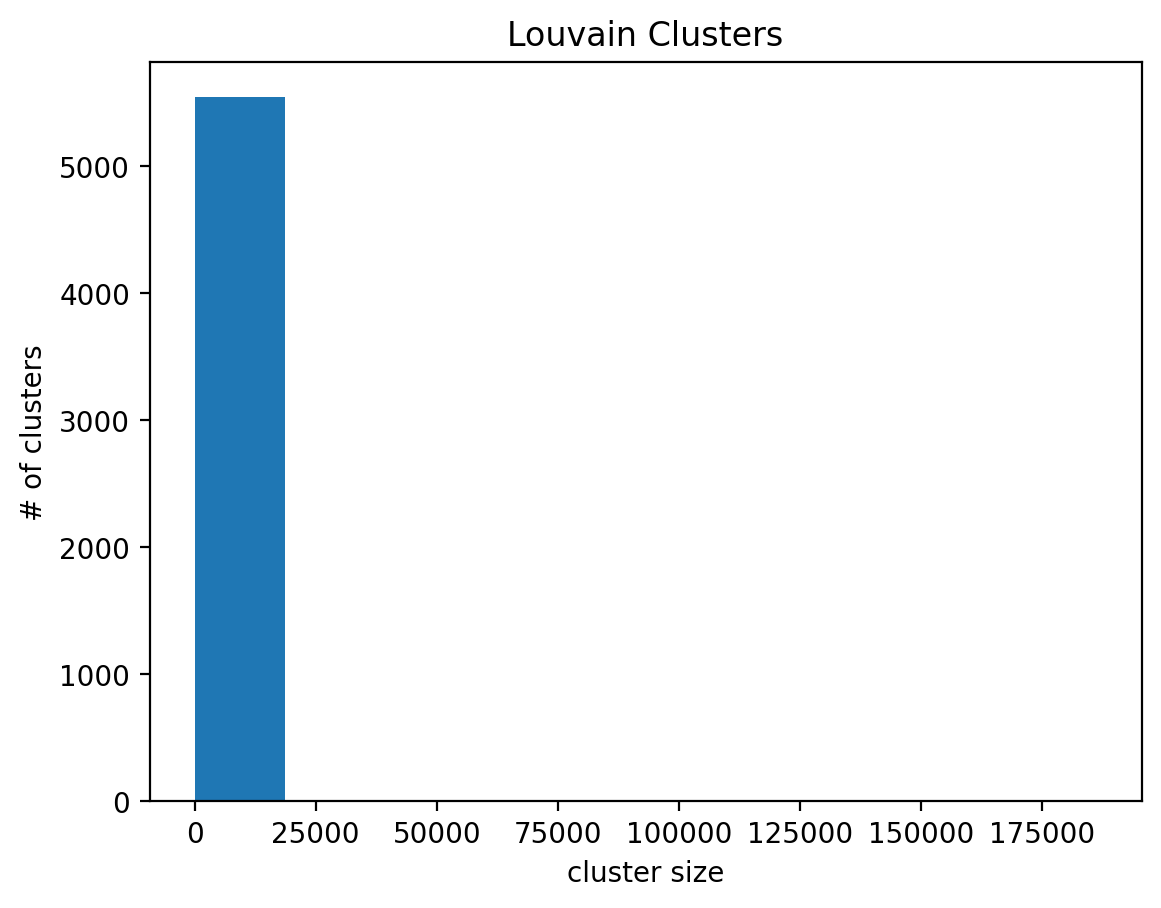

In [25]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 6.971023143950696
number of clusters: 49
largest: 169189
smallest: 8
mean cluster size: 23161.02
standard deviation: 39044.16


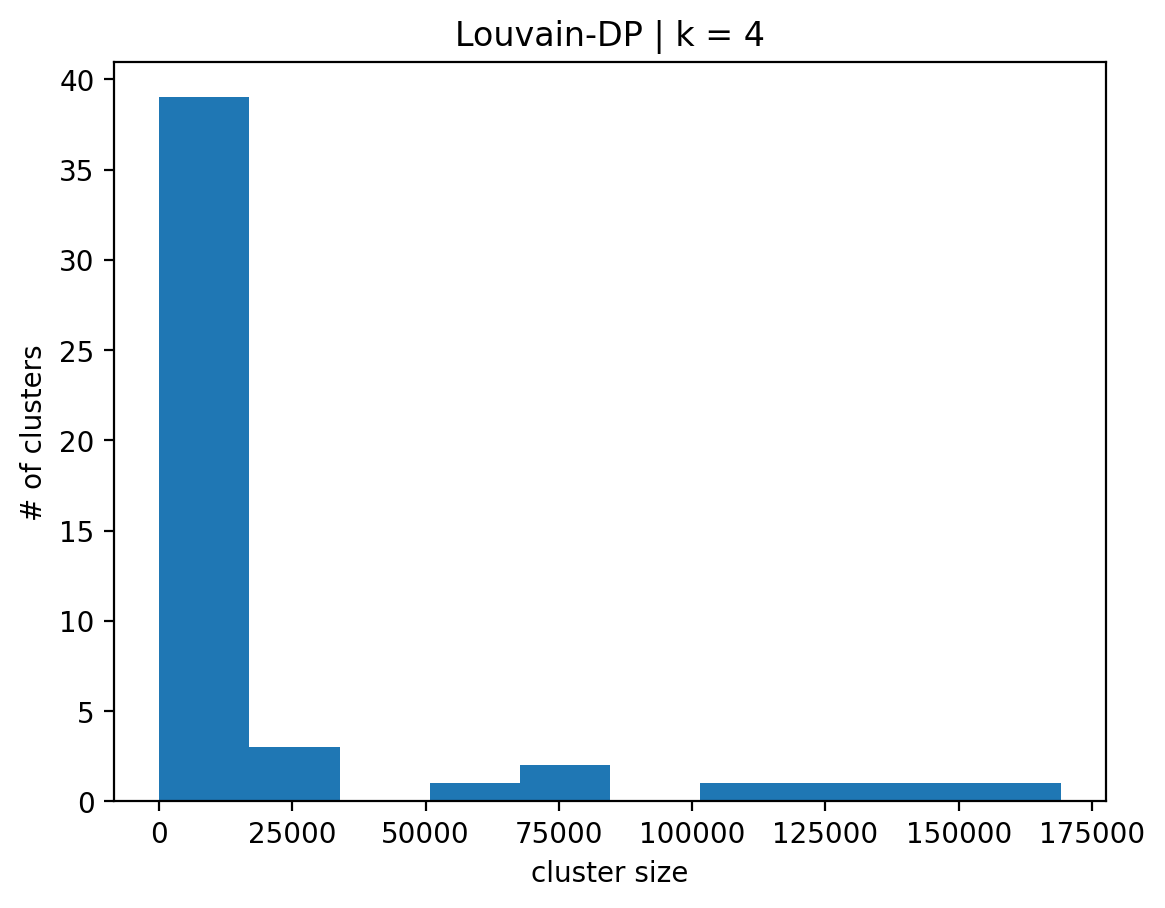

k: 8
epsilon 6.971023143950696
number of clusters: 22
largest: 202416
smallest: 3432
mean cluster size: 51585.91
standard deviation: 60029.38


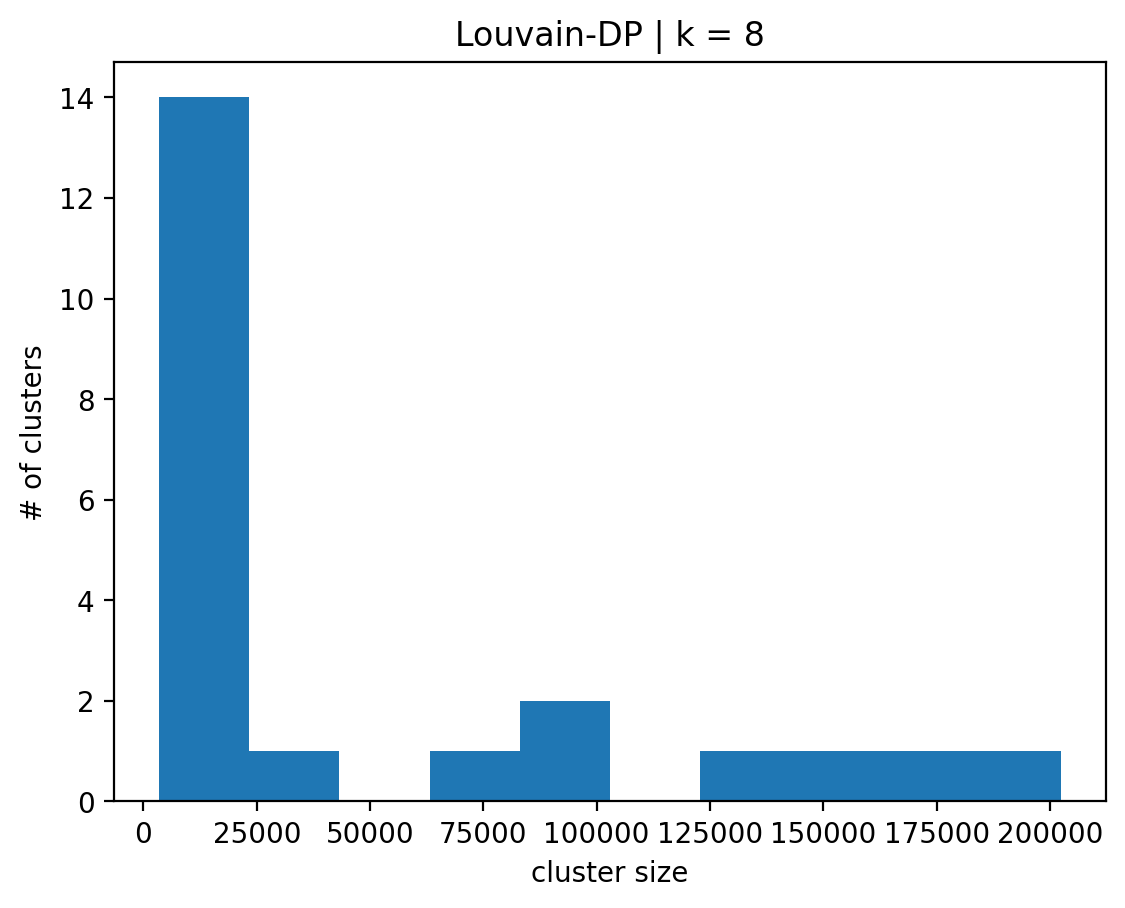

k: 16
epsilon 6.971023143950696
number of clusters: 12
largest: 237264
smallest: 144
mean cluster size: 94574.17
standard deviation: 79994.3


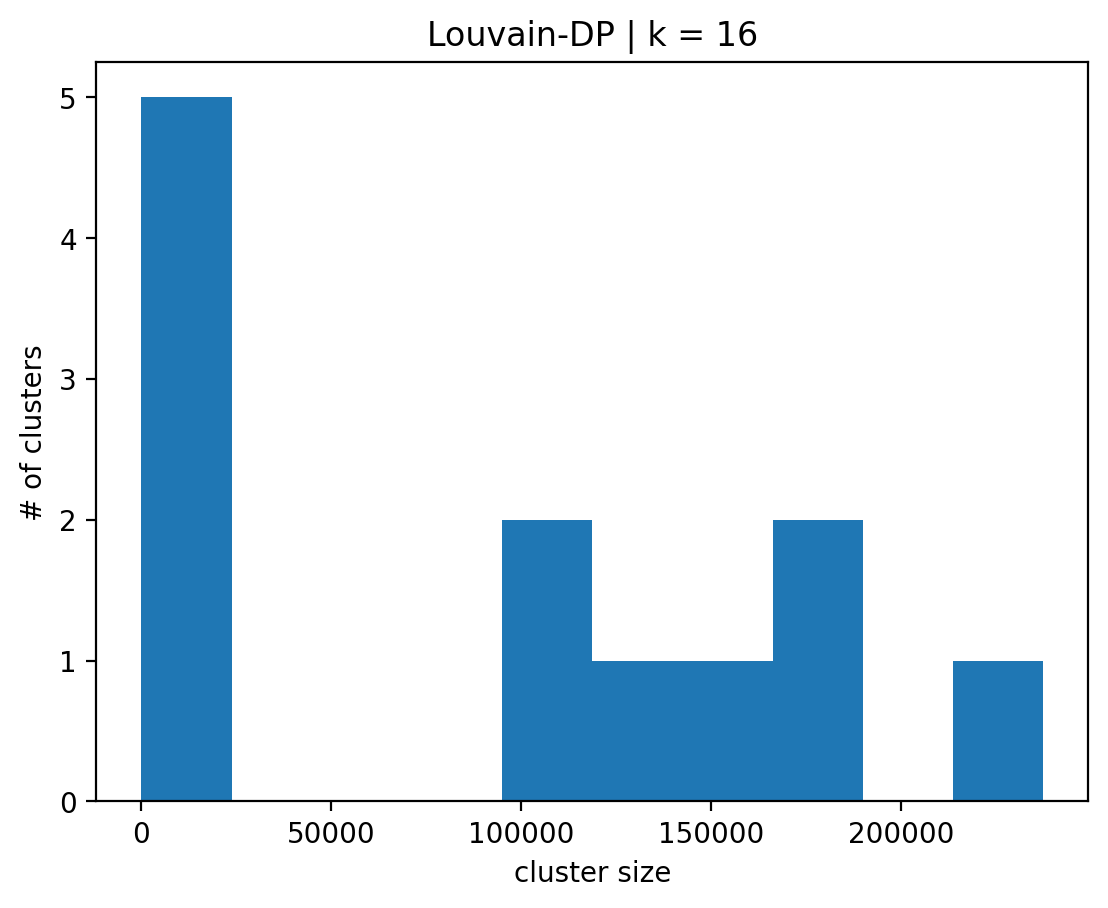

k: 32
epsilon 6.971023143950696
number of clusters: 9
largest: 273827
smallest: 353
mean cluster size: 126098.89
standard deviation: 110327.17


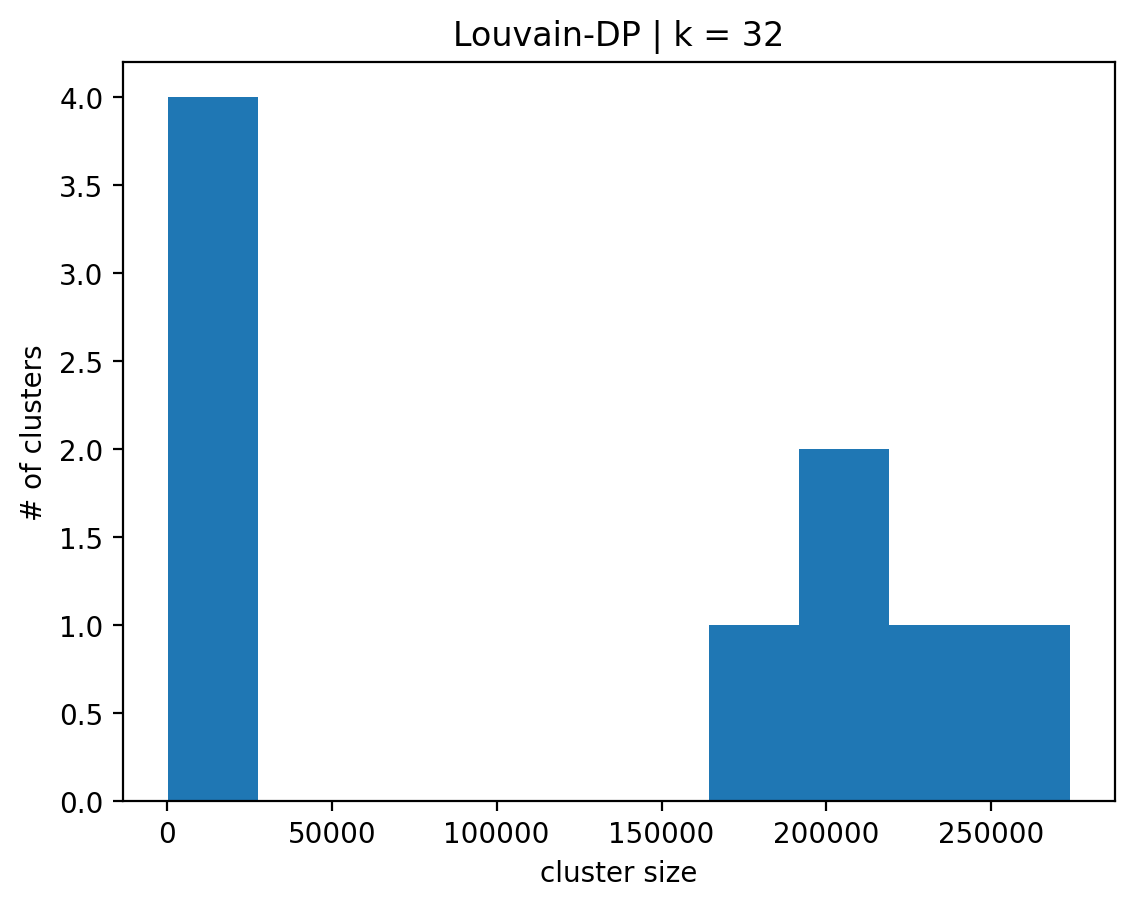

k: 64
epsilon 6.971023143950696
number of clusters: 5
largest: 262343
smallest: 175237
mean cluster size: 226978.0
standard deviation: 28858.82


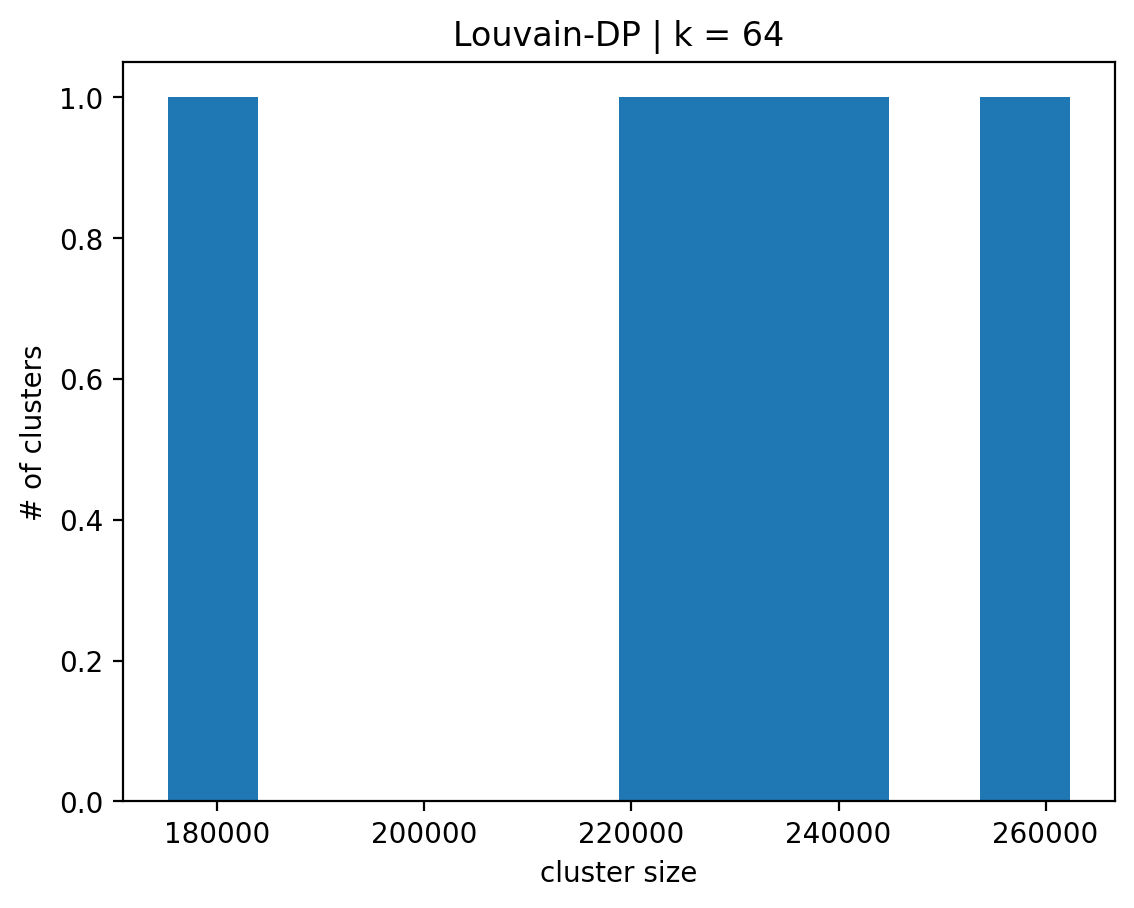

In [26]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [27]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.7208688227909387 

Modularity of Louvain-DP communities: 0.31853850189368943 	| k: 4
Modularity of Louvain-DP communities: 0.22930726032734666 	| k: 8
Modularity of Louvain-DP communities: 0.19966541651456793 	| k: 16
Modularity of Louvain-DP communities: 0.14001897077523107 	| k: 32
Modularity of Louvain-DP communities: 0.09107911164039882 	| k: 64
